# Preprocessing

Use NLTK package to perform a preprocessing pipline for Twitter datasets.

# Setup

In [3]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

# Download Twitter dataset

In [4]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\baont\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print('Number of positive tweets:', len(all_positive_tweets))
print('Number of negative tweets:', len(all_negative_tweets))

print('The type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets: 5000
Number of negative tweets: 5000
The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


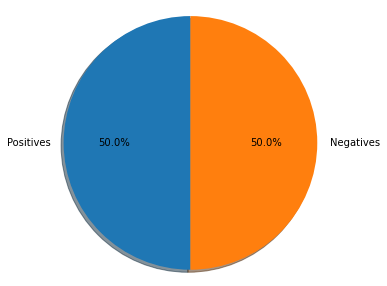

In [10]:
#Declare a figure with a custom size
fig = plt.figure(figsize=(5,5))

#Labels for the two classes
labels = 'Positives', 'Negatives'

#Sizes for each slide
sizes = [len(all_positive_tweets),len(all_negative_tweets)]

#Decleare pie chart, where the slices will be orrderd and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)

#Eqaul aspect ratio ensures that pie iss drawn as a circle

plt.axis('equal')

#Display the chare

plt.show()

# Raw text

In [11]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

Good morning all! Have a fab Friday! :)
@nba2kmobile @MyNBA2KRT @mynba2k15credit I would but have only 1.300 credits :(


# Preprocess Raw Text For Sentiment Analysis

For NLP, the preprocessing steps are comprised off the following tasks:

- Tokenizing the string
- Lowercasing
- Removing stop words and punctuation
- Stemming



In [14]:
tweet = all_positive_tweets[2108]
print(tweet)

@Bluegirl200345 We're always here if you want to talk :)
~😊


In [15]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baont\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

## Remove Hyperlinks, Twitter marks and styles

Using regex

In [19]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

@Bluegirl200345 We're always here if you want to talk :)
~😊

@Bluegirl200345 We're always here if you want to talk :)
~😊


## Tokenize the string


In [21]:
print('\033[92m' + tweet2)
print('\033[94m')

tokenized = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens = tokenized.tokenize(tweet2)

print(tweet_tokens)

@Bluegirl200345 We're always here if you want to talk :)
~😊

["we're", 'always', 'here', 'if', 'you', 'want', 'to', 'talk', ':)', '~', '😊']


## Remove Stop word and punctuations

In [25]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

stopwords_english.append("we're")
print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [26]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []
for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)

print(tweets_clean)



["we're", 'always', 'here', 'if', 'you', 'want', 'to', 'talk', ':)', '~', '😊']

['always', 'want', 'talk', ':)', '😊']


## Stemming

In [27]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)




['always', 'want', 'talk', ':)', '😊']

stemmed words:
['alway', 'want', 'talk', ':)', '😊']
